**Appendices A and B**

*Lukas Bodenmann, ETH Zurich, March 2023*

This supplementary material provides additional insights on the proposed correlation model that accounts for path and site effects. The main manuscript focuses on the intensity measure of the elastic, 5% damped spectral acceleration at a vibration period of one second, Sa(1s). Here we recreate several results for the two other IMs: Sa(0.3s) and Sa(3s). 

In [1]:
import sys
sys.path.append('../utils/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils_plotting import updaterc, cm_to_inch
import os
plt.style.use(['seaborn-v0_8'])
updaterc()

In [2]:
# Specify paths to the corresponding folders
path_res_params = os.path.join(os.pardir + os.sep + 'results' + os.sep
    + 'PosteriorParameters' + os.sep)
path_res_casestudy = os.path.join(os.pardir + os.sep + 'results' + os.sep
    + 'CaseStudy' + os.sep )

# Posterior correlation models E and EAS
*Figure 4 in the manuscript*

Posterior correlation models EAS and E for Sa(T) as a function of Euclidean distance and soil dissimilarity plotted at three
angular distances: (from left to right) 5°, 30° and 60°. The shaded area indicates the interval between the 95% and 5% quantile of all sampled
functions from the posterior.

In [3]:
dA = [5, 30, 60]
dS = [10, 100, 400]
figsize = cm_to_inch((16.0, 6.5))

## Sa(T = 0.3s)

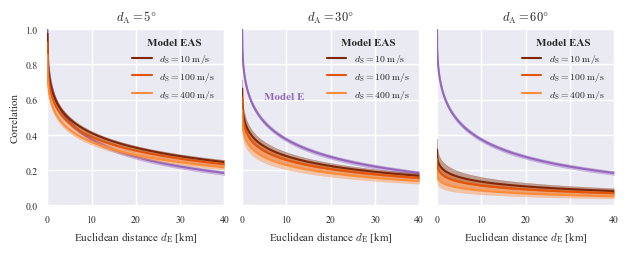

In [4]:
from utils_plotting import fig4
# Specify im
imstring = 'T030'

# Load parameters
fname = 'PostParam_Pooled_' + imstring
dfE = pd.read_csv(path_res_params + fname + '_E.csv')
dfEAS = pd.read_csv(path_res_params + fname + '_EAS.csv')

# Create Figure
fig, axs = plt.subplots(1,3,constrained_layout=True, figsize=figsize, sharey='row')
fig4(axs, dA, dS, dfE, dfEAS)
fig.tight_layout()

## Sa(T = 3.0s)

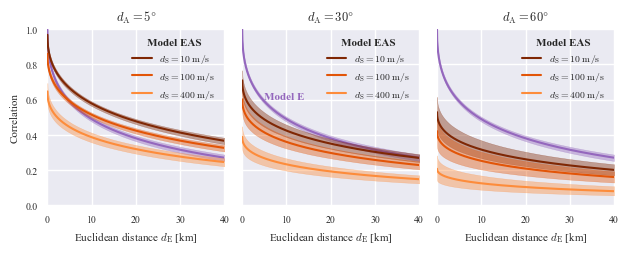

In [5]:
# Specify im
imstring = 'T300'

# Load parameters
fname = 'PostParam_Pooled_' + imstring
dfE = pd.read_csv(path_res_params + fname + '_E.csv')
dfEAS = pd.read_csv(path_res_params + fname + '_EAS.csv')

# Create Figure
fig, axs = plt.subplots(1,3,constrained_layout=True, figsize=figsize, sharey='row')
fig4(axs, dA, dS, dfE, dfEAS)
fig.tight_layout()

# Case study (San Francisco Bay Area)

To enable a comparison across different IMs we compute the proportion of sites at which a certain site-specific threshold was jointly exceeded in the specified rupture scenario.

As stated in Section 2 of the manuscript, the GMM provides for each site $i$, the mean of the logarithmic $im$, and the standard deviations $\phi$ and $\tau$ of the between- and within-event residuals. Based on that information, we compute for each site the $im$ value which has a 10% probability of being exceeded in the specified scenario. The exceedance probability of $sa$ follows from
$$
P(Sa(T) > sa) = 1 - \Phi\left(\frac{sa - \mu_{lnIM}}{\sqrt{\phi^2 + \tau^2}}\right)~,
$$
and the site-specific thresholds are obtained by solving the above equation for the desired exceedance probability (here 10%).

## Comparison of models E and EAS
*Similar to Figure 11 in the manuscript*

Exceedance probability curves for the proportion of sites a in the considered subregions where Sa(T) jointly exceeds threshold
values sa. Numbered boxes indicate the subregions of interest.

In [6]:
models = ['E', 'EAS']
fnames = ['PropCCDF_MeanParam_model' + m + '_poe010' for m in models]
figsize = cm_to_inch((17.0,9))
from utils_plotting import fig11

### Sa(T = 0.3s)

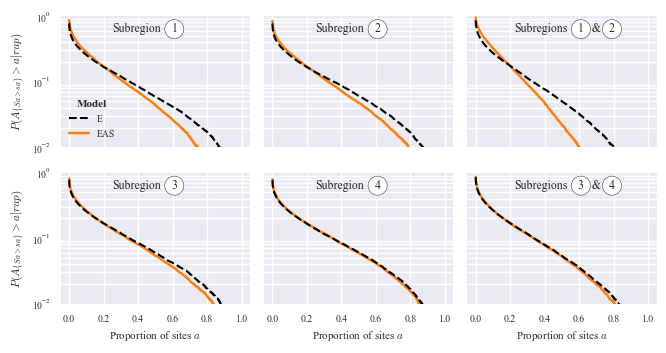

In [7]:
# Specify IM
imstring = 'sa03'

# Load results
dfs = [pd.read_csv(path_res_casestudy + name + '_' 
                   + imstring + '.csv') for name in fnames]

# Create figure
fig, axss = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
fig11(axss, dfs)
fig.tight_layout()

### Sa(T = 3.0s)

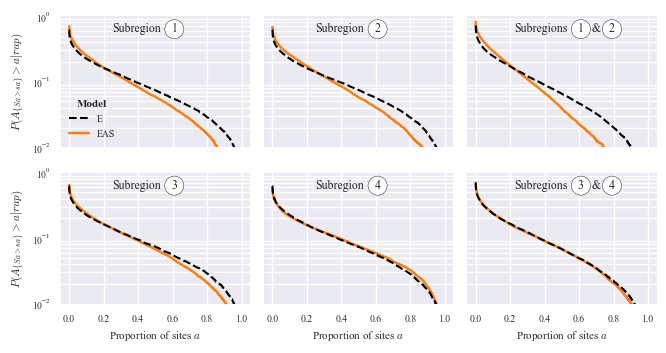

In [8]:
# Specify IM
imstring = 'sa3'

# Load results
dfs = [pd.read_csv(path_res_casestudy + name + '_' 
                   + imstring + '.csv') for name in fnames]

# Create figure
fig, axss = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
fig11(axss, dfs)
fig.tight_layout()

## Comparison across different IMs

Exceedance probability curves for the proportion of sites a in the considered subregions where Sa(T) jointly exceeds threshold
values sa. Numbered boxes indicate the subregions of interest.

In [9]:
imstrings = ['sa03', 'sa1', 'sa3']
from utils_plotting import fig_Supp_CS

### Model E

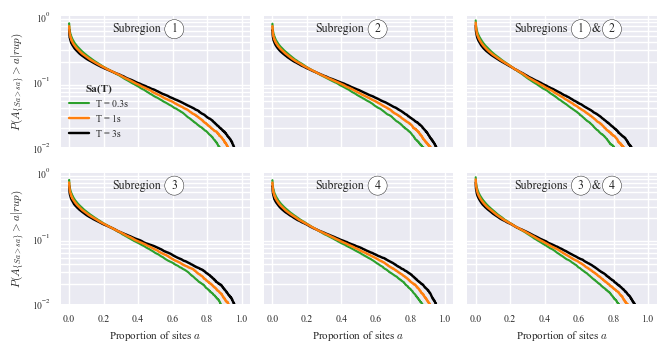

In [10]:
# Specify model
m = 'E'
fname = 'PropCCDF_MeanParam_model' + m + '_poe010'
dfs = [pd.read_csv(path_res_casestudy + fname + '_' 
                   + imstring + '.csv') for imstring in imstrings]

# Create Figure
fig, axss = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
fig_Supp_CS(axss, dfs)
fig.tight_layout()

### Model EAS

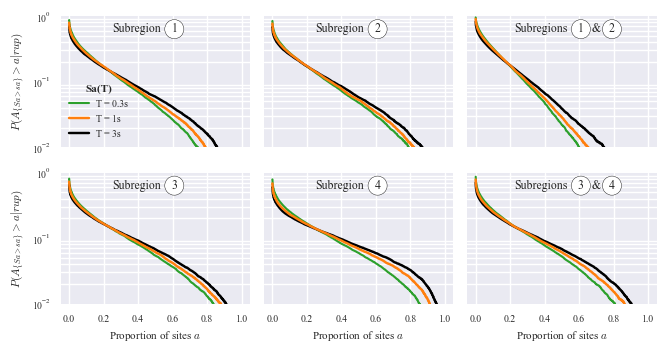

In [11]:
m = 'EAS'
fname = 'PropCCDF_MeanParam_model' + m + '_poe010'
dfs = [pd.read_csv(path_res_casestudy + fname + '_' 
                   + imstring + '.csv') for imstring in imstrings]

fig, axss = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
fig_Supp_CS(axss, dfs)
fig.tight_layout()